# RFM Analysis: Unveiling Customer Segmentation Insights

### Importing Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Reading Data

In [2]:
df_data=pd.read_csv(r"C:\Users\sm983\Desktop\ML Advanced Exam Paper\Dataset\RFM Dataset\RFM data.csv")
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


### Checking shape

In [3]:
df_data.shape

(392735, 9)

### Checking overview of Data

In [42]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18046 entries, 0 to 392720
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype          
---  ------       --------------  -----          
 0   InvoiceNo    18046 non-null  int64          
 1   StockCode    18046 non-null  object         
 2   Description  18046 non-null  object         
 3   Quantity     18046 non-null  int64          
 4   UnitPrice    18046 non-null  float64        
 5   CustomerID   18046 non-null  int32          
 6   Country      18046 non-null  object         
 7   TotalPrice   18046 non-null  float64        
 8   Date         18046 non-null  datetime64[ns] 
 9   Time         18046 non-null  object         
 10  recency      18046 non-null  timedelta64[ns]
dtypes: datetime64[ns](1), float64(2), int32(1), int64(2), object(4), timedelta64[ns](1)
memory usage: 1.6+ MB


### checking dtypes

In [43]:
df_data.dtypes

InvoiceNo                int64
StockCode               object
Description             object
Quantity                 int64
UnitPrice              float64
CustomerID               int32
Country                 object
TotalPrice             float64
Date            datetime64[ns]
Time                    object
recency        timedelta64[ns]
dtype: object

### Checking null values

In [4]:
df_data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
TotalPrice     0
dtype: int64

# Preprocessing steps for cleaning data by 
 ### 1.treating duplciates
 ### 2.formatting Date columns

In [5]:
df_data['CustomerID'].nunique()

4298

In [6]:
df_data['InvoiceNo'].nunique()

18046

In [7]:
df_data = df_data.drop_duplicates()
# Check the updated DataFrame
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,white metal lantern,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,cream cupid hearts coat hanger,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,knitted union flag hot water bottle,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,red woolly hottie white heart.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [8]:
df_data.shape

(387553, 9)

In [9]:
df_data = df_data.drop_duplicates(subset=['InvoiceNo'])
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
7,536366,22633,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08
21,536368,22960,jam making set with jars,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,25.50
25,536369,21756,bath building block word,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,17.85


In [10]:
df_data.shape

(18046, 9)

In [11]:
df_data.head(20)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
7,536366,22633,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10
9,536367,84879,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08
21,536368,22960,jam making set with jars,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,25.50
25,536369,21756,bath building block word,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,17.85
26,536370,22728,alarm clock bakelike pink,24,2010-12-01 08:45:00,3.75,12583.0,France,90.00
45,536371,22086,paper chain kit 50's christmas,80,2010-12-01 09:00:00,2.55,13748.0,United Kingdom,204.00
46,536372,22632,hand warmer red polka dot,6,2010-12-01 09:01:00,1.85,17850.0,United Kingdom,11.10
48,536373,85123A,white hanging heart t-light holder,6,2010-12-01 09:02:00,2.55,17850.0,United Kingdom,15.30
64,536374,21258,victorian sewing box large,32,2010-12-01 09:09:00,10.95,15100.0,United Kingdom,350.40


In [12]:
df_data['InvoiceDate'].unique()

array(['2010-12-01 08:26:00', '2010-12-01 08:28:00',
       '2010-12-01 08:34:00', ..., '2011-12-09 12:31:00',
       '2011-12-09 12:49:00', '2011-12-09 12:50:00'], dtype=object)

In [13]:
df_data['InvoiceDate'].value_counts()

InvoiceDate
2011-05-26 14:09:00    4
2011-10-21 14:41:00    4
2011-09-19 14:43:00    3
2011-10-10 14:37:00    3
2011-11-23 13:27:00    3
                      ..
2011-05-09 14:10:00    1
2011-05-09 14:22:00    1
2011-05-09 14:54:00    1
2011-05-09 15:12:00    1
2011-12-09 12:50:00    1
Name: count, Length: 16834, dtype: int64

In [14]:
date_time_split=df_data['InvoiceDate'].str.split(' ')
date_time_split.head()

0     [2010-12-01, 08:26:00]
7     [2010-12-01, 08:28:00]
9     [2010-12-01, 08:34:00]
21    [2010-12-01, 08:34:00]
25    [2010-12-01, 08:35:00]
Name: InvoiceDate, dtype: object

In [15]:
df_data['Date']=[i[0] for i in df_data['InvoiceDate'].str.split(' ')]

In [16]:
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01
7,536366,22633,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010-12-01
9,536367,84879,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010-12-01
21,536368,22960,jam making set with jars,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,25.50,2010-12-01
25,536369,21756,bath building block word,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,17.85,2010-12-01


In [17]:
df_data['Time']=[i[1] for i in df_data['InvoiceDate'].str.split(' ')]

In [18]:
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice,Date,Time
0,536365,85123A,white hanging heart t-light holder,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30,2010-12-01,08:26:00
7,536366,22633,hand warmer union jack,6,2010-12-01 08:28:00,1.85,17850.0,United Kingdom,11.10,2010-12-01,08:28:00
9,536367,84879,assorted colour bird ornament,32,2010-12-01 08:34:00,1.69,13047.0,United Kingdom,54.08,2010-12-01,08:34:00
21,536368,22960,jam making set with jars,6,2010-12-01 08:34:00,4.25,13047.0,United Kingdom,25.50,2010-12-01,08:34:00
25,536369,21756,bath building block word,3,2010-12-01 08:35:00,5.95,13047.0,United Kingdom,17.85,2010-12-01,08:35:00


In [19]:
df_data.drop(columns=['InvoiceDate'], inplace=True)
print(df_data.head())

    InvoiceNo StockCode                         Description  Quantity  \
0      536365    85123A  white hanging heart t-light holder         6   
7      536366     22633              hand warmer union jack         6   
9      536367     84879       assorted colour bird ornament        32   
21     536368     22960            jam making set with jars         6   
25     536369     21756            bath building block word         3   

    UnitPrice  CustomerID         Country  TotalPrice        Date      Time  
0        2.55     17850.0  United Kingdom       15.30  2010-12-01  08:26:00  
7        1.85     17850.0  United Kingdom       11.10  2010-12-01  08:28:00  
9        1.69     13047.0  United Kingdom       54.08  2010-12-01  08:34:00  
21       4.25     13047.0  United Kingdom       25.50  2010-12-01  08:34:00  
25       5.95     13047.0  United Kingdom       17.85  2010-12-01  08:35:00  


In [20]:
from datetime import datetime 
df_data['Date'] = pd.to_datetime(df_data['Date'])

In [21]:
df_data.dtypes

InvoiceNo               int64
StockCode              object
Description            object
Quantity                int64
UnitPrice             float64
CustomerID            float64
Country                object
TotalPrice            float64
Date           datetime64[ns]
Time                   object
dtype: object

In [22]:
df_data['CustomerID'] = df_data['CustomerID'].astype(int)

In [23]:
df_data.head()

,InvoiceNo,StockCode,Description,Quantity,UnitPrice,CustomerID,Country,TotalPrice,Date,Time
0,536365,85123A,white hanging heart t-light holder,6,2.55,17850,United Kingdom,15.30,2010-12-01,08:26:00
7,536366,22633,hand warmer union jack,6,1.85,17850,United Kingdom,11.10,2010-12-01,08:28:00
9,536367,84879,assorted colour bird ornament,32,1.69,13047,United Kingdom,54.08,2010-12-01,08:34:00
21,536368,22960,jam making set with jars,6,4.25,13047,United Kingdom,25.50,2010-12-01,08:34:00
25,536369,21756,bath building block word,3,5.95,13047,United Kingdom,17.85,2010-12-01,08:35:00


### Caluculating Recency

In [24]:
df_data['recency']=[datetime.today().date()-i.date() for i in df_data['Date']]

In [25]:
df_recency=df_data.groupby(by=['CustomerID'],sort=True)['recency'].min().reset_index()
df_recency.rename(columns={'recency':'recent'},inplace = True)
df_recency.shape

(4298, 2)

In [26]:
df_recency.head()

,CustomerID,recent
0,12347,4496 days
1,12348,4569 days
2,12349,4512 days
3,12350,4804 days
4,12352,4530 days


### caluculating Freqency

In [27]:
frequency_data=df_data.groupby(by=['CustomerID'])['InvoiceNo'].count().reset_index()
frequency_data.rename(columns= {'InvoiceNo': 'Frequency'}, inplace = True)
frequency_data

,CustomerID,Frequency
0,12347,7
1,12348,4
2,12349,1
3,12350,1
4,12352,7
...,...,...
4293,18280,1
4294,18281,1
4295,18282,2
4296,18283,16


### caluculating Monetary

In [29]:
df_monetary=df_data.groupby(by=['CustomerID'])['TotalPrice'].sum().reset_index()
df_monetary.rename(columns={'TotalPrice':'MonetaryValue'},inplace = True)
df_monetary.head()

,CustomerID,MonetaryValue
0,12347,163.16
1,12348,331.36
2,12349,15.00
3,12350,25.20
4,12352,135.30


In [30]:
df_rfm = df_recency.merge(frequency_data, on='CustomerID', how='left')
df_rfm = df_rfm.merge(df_monetary, on='CustomerID', how='left')
df_rfm.head()

,CustomerID,recent,Frequency,MonetaryValue
0,12347,4496 days,7,163.16
1,12348,4569 days,4,331.36
2,12349,4512 days,1,15.00
3,12350,4804 days,1,25.20
4,12352,4530 days,7,135.30


In [31]:
df_rfm.shape

(4298, 4)

### Adding RFM Scores

In [32]:
recency_scores = [5, 4, 3, 2, 1]
frequency_scores = [1, 2, 3, 4, 5]
monetary_scores = [1, 2, 3, 4 ,5]
#Cut function is used to separate the array elements into different bins
df_rfm['RecencyScore'] = pd.cut(df_rfm['recent'], bins = 5, labels= recency_scores)
df_rfm['FrequencyScore'] = pd.cut(df_rfm['Frequency'], bins = 5, labels= frequency_scores)
df_rfm['MonetaryScore'] = pd.cut(df_rfm['MonetaryValue'], bins= 5, labels= monetary_scores)
df_rfm.head()

,CustomerID,recent,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore
0,12347,4496 days,7,163.16,5,1,1
1,12348,4569 days,4,331.36,4,1,1
2,12349,4512 days,1,15.00,5,1,1
3,12350,4804 days,1,25.20,1,1,1
4,12352,4530 days,7,135.30,5,1,1


In [33]:
df_rfm['RecencyScore'] = df_rfm['RecencyScore'].astype(int)
df_rfm['FrequencyScore'] = df_rfm['FrequencyScore'].astype(int)
df_rfm['MonetaryScore'] = df_rfm['MonetaryScore'].astype(int)

In [34]:
df_rfm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4298 entries, 0 to 4297
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype          
---  ------          --------------  -----          
 0   CustomerID      4298 non-null   int32          
 1   recent          4298 non-null   timedelta64[ns]
 2   Frequency       4298 non-null   int64          
 3   MonetaryValue   4298 non-null   float64        
 4   RecencyScore    4298 non-null   int32          
 5   FrequencyScore  4298 non-null   int32          
 6   MonetaryScore   4298 non-null   int32          
dtypes: float64(1), int32(4), int64(1), timedelta64[ns](1)
memory usage: 168.0 KB


In [35]:
df_rfm['RFM_Score'] = df_rfm['RecencyScore'] + df_rfm['FrequencyScore'] + df_rfm['MonetaryScore']
segment_labels = ['Low-Value', 'Mid-Value', 'High-Value']
df_rfm['Value Segment'] = pd.qcut(df_rfm['RFM_Score'], q= 3, labels= segment_labels)
df_rfm.head()

,CustomerID,recent,Frequency,MonetaryValue,RecencyScore,FrequencyScore,MonetaryScore,RFM_Score,Value Segment
0,12347,4496 days,7,163.16,5,1,1,7,Mid-Value
1,12348,4569 days,4,331.36,4,1,1,6,Low-Value
2,12349,4512 days,1,15.00,5,1,1,7,Mid-Value
3,12350,4804 days,1,25.20,1,1,1,3,Low-Value
4,12352,4530 days,7,135.30,5,1,1,7,Mid-Value


### Fetching RFM_Segments

In [ ]:
segment_counts = df_rfm['Value Segment'].value_counts().reset_index()
segment_counts.columns = ['Value Segment', 'Count']
segment_counts.head()

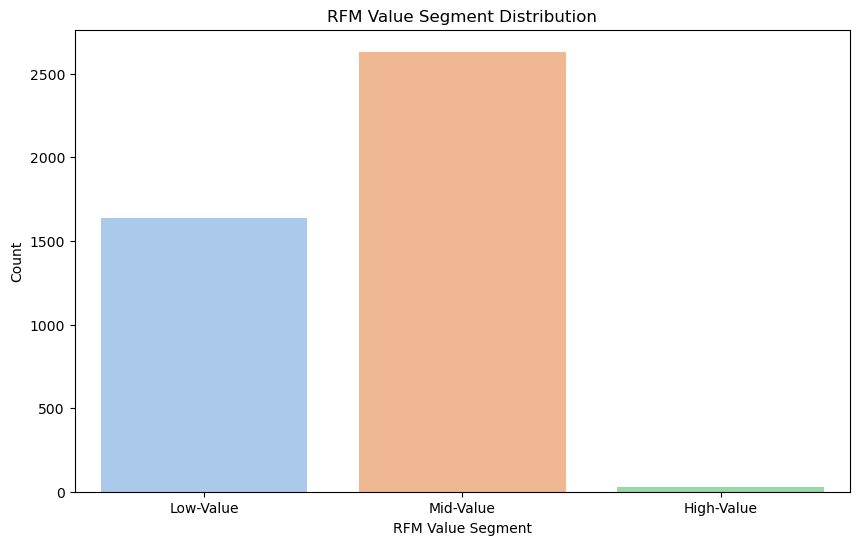

In [37]:
pastel_colors = sns.color_palette('pastel')
plt.figure(figsize=(10,6))
sns.barplot(data = segment_counts, x = 'Value Segment', y = 'Count', palette= pastel_colors)
plt.title('RFM Value Segment Distribution')
plt.xlabel('RFM Value Segment')
plt.ylabel('Count')
plt.show()

### Segmentation of customers based on RFM_Scores

In [39]:
df_rfm['RFM Customer Segments'] = ''
df_rfm.loc[df_rfm['RFM_Score'].between(12, 15), 'RFM Customer Segments'] = 'Champions'
df_rfm.loc[df_rfm['RFM_Score'].between(9, 11), 'RFM Customer Segments'] = 'Loyal customers'
df_rfm.loc[df_rfm['RFM_Score'].between(8, 9), 'RFM Customer Segments'] = 'Potential loyalist'
df_rfm.loc[df_rfm['RFM_Score'].between(6, 7), 'RFM Customer Segments'] = 'Recent customers'
df_rfm.loc[df_rfm['RFM_Score'].between(6, 7), 'RFM Customer Segments'] = 'Promising'
df_rfm.loc[df_rfm['RFM_Score'].between(5, 6), 'RFM Customer Segments'] = 'Needs attention'
df_rfm.loc[df_rfm['RFM_Score'].between(3, 4), 'RFM Customer Segments'] = 'About to sleep'
df_rfm.loc[df_rfm['RFM_Score'].between(3, 6), 'RFM Customer Segments'] = 'At risk'
df_rfm.loc[df_rfm['RFM_Score'].between(3, 6), 'RFM Customer Segments'] = "Can't lose them"
df_rfm.loc[df_rfm['RFM_Score'].between(2, 3), 'RFM Customer Segments'] = 'Hibernating'
df_rfm[['CustomerID', 'RFM Customer Segments']]

,CustomerID,RFM Customer Segments
0,12347,Promising
1,12348,Can't lose them
2,12349,Promising
3,12350,Hibernating
4,12352,Promising
...,...,...
4293,18280,Can't lose them
4294,18281,Can't lose them
4295,18282,Promising
4296,18283,Promising


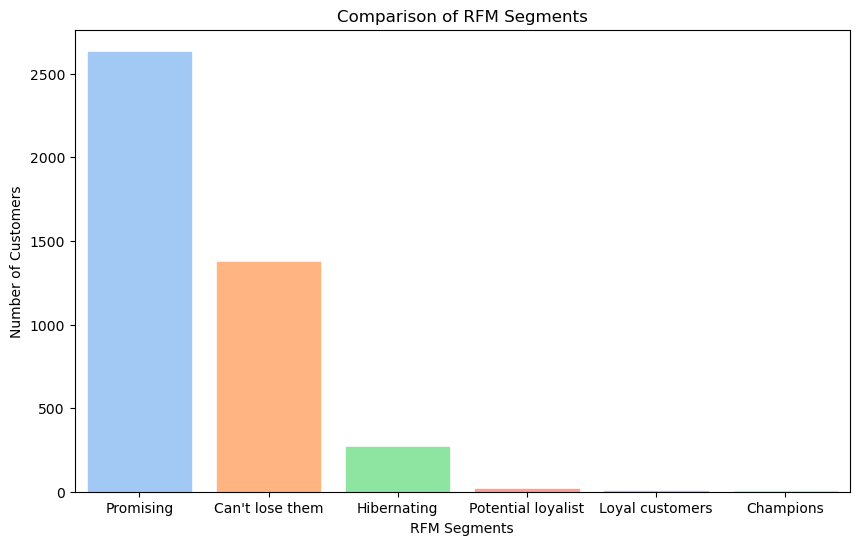

In [41]:
segment_counts = df_rfm['RFM Customer Segments'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x = segment_counts.index, y=segment_counts.values, palette= 'pastel')
champions_color = pastel_colors[9]
colors = [champions_color if segment == 'Champions' else pastel_colors[i] for i, segment in enumerate(segment_counts.index)]
ax = plt.gca()
for i, bar in enumerate(ax.patches):
    bar.set_color(colors[i])
plt.title('Comparison of RFM Segments')
plt.xlabel('RFM Segments')
plt.ylabel('Number of Customers')
ax.yaxis.grid(False)
plt.show()

<Axes: >

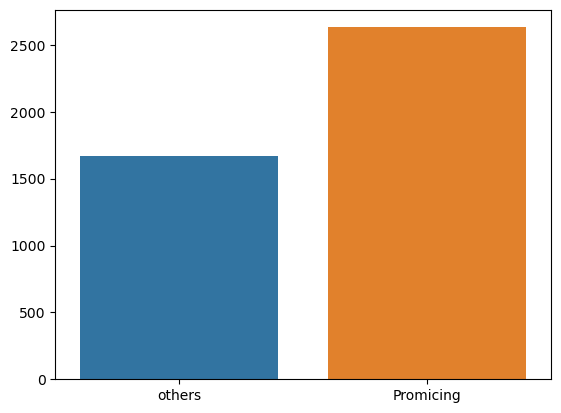

In [50]:
segment_counts = pd.DataFrame(df_rfm['RFM Customer Segments'].value_counts())
dic={"others":segment_counts['count'][1:].sum(),'Promicing':segment_counts['count'][:1].sum()}
sns.barplot(x = list(dic.keys()), y=list(dic.values()))

# Conclusion:

From the above RFM_segmentation analysis we can observe that there are much more promising customers and we have around 38% people from 'can't lose them' category of customers and from the given 10 customer segementation according to data after calulating rfm scores  based on rfm scores only customers are segmented to 'Promising','Cant lose them','Hibernating','Potential loyalists','Loyal customers','champions'and to increase the bussiness its better they increase customers of champions category by giviing more discounts membership cards and focussing campighns on promising and cantlose them and champions and to know the depth analysis of reasons what infleunced the customers to be their respective categories like being promisisng customers or champions we can go for other models and analyze churn of customers.